In [1]:
from nltk import TreebankWordTokenizer, word_tokenize
import nltk
from nltk.corpus import stopwords
import gensim
from gensim.models import Word2Vec 
from bs4 import BeautifulSoup
from sklearn.metrics.pairwise import cosine_similarity
import glob
from pathlib import Path
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#load skipgram model
model_sg = Word2Vec.load("data/a_library_model.model")

In [155]:
#counts decades from input to 2020
def decade_to_present(start_decade):
    decades = []
    for i in range (start_decade, 2030, 10):
        decades.append(str(i))
    return decades

decade_to_present(1960)

['1960', '1970', '1980', '1990', '2000', '2010', '2020']

In [178]:
#find most similar terms from start decade to present
def term_over_time(term, start_decade):
    to_model = []
    output = []
    for dec in decade_to_present(start_decade):
        to_model.append(term + "_" + dec)
    for t in to_model:
            try:
                output.append(t[-4:] + ' top 5 ' + str(model_sg.wv.most_similar(t, topn=5)))
            except KeyError:
                 output.append(t[-4:] + ' term not present in decade')

    return output

term_over_time('marx', 1970)

["1970 top 5 [('engels_1970', 0.9596370458602905), ('bakunin_1970', 0.9579035043716431), ('writings_1970', 0.957262396812439), ('marx’s_1970', 0.9527772068977356), ('anarchism._1970', 0.9484095573425293)]",
 "1980 top 5 [('bakunin_1980', 0.9864181876182556), ('proudhon_1980', 0.9847764372825623), ('kropotkin_1980', 0.9822179079055786), ('engels_1980', 0.9816332459449768), ('philosophy_1980', 0.9802728891372681)]",
 "1990 top 5 [('engels_1990', 0.954735517501831), ('bakunin_1990', 0.9305642247200012), ('marx’s_1990', 0.9193047881126404), ('karl_1990', 0.9177855849266052), ('proudhon_1990', 0.9107612371444702)]",
 "2000 top 5 [('engels_2000', 0.9423165321350098), ('marx’s_2000', 0.8952186107635498), ('karl_2000', 0.8845432996749878), ('marx._2000', 0.8825342655181885), ('engels._2000', 0.858886182308197)]",
 "2010 top 5 [('engels_2010', 0.9552525877952576), ('marx’s_2010', 0.9054922461509705), ('karl_2010', 0.8974920511245728), ('engels._2010', 0.8631057143211365), ('grundrisse_2010', 0.

In [34]:
#track cosine similarity between two terms from start_decade to present

def relation_over_time(term1, term2, start_decade):
    to_model = []
    output = []
    for dec in decade_to_present(start_decade):
        to_model.append([term1 + "_" + dec, term2 + "_" + dec])
    for t1, t2 in to_model:
            try:
                output.append(model_sg.wv.similarity(t1, t2))
            except KeyError:
                 output.append(' term not present in decade')
    return output

relation_over_time('marx', 'engels', 1970)



[0.959637, 0.9816333, 0.95473564, 0.9423165, 0.9552526, 0.9632702]

<function matplotlib.pyplot.show(close=None, block=None)>

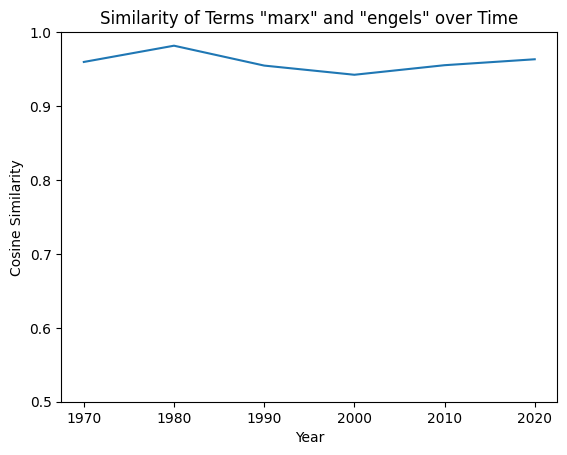

In [174]:
decades_for_plot = []
for dec in decade_to_present(1970):
    decades_for_plot.append(dec)
x = decades_for_plot
y = np.array(relation_over_time('marx', 'engels', 1970))

plt.plot(x, y)
plt.ylim(0.5, 1)
plt.xlabel("Year")
plt.ylabel("Cosine Similarity")
plt.title('Similarity of Terms "marx" and "engels" over Time')
plt.show


In [218]:
term_over_time('council', 1880)

["1880 top 5 [('appointed_1880', 0.9961898326873779), ('commission_1880', 0.995882511138916), ('massachusetts_1880', 0.9954822659492493), ('200_1880', 0.9947701692581177), ('prominent_1880', 0.9947269558906555)]",
 "1890 top 5 [('offers_1890', 0.9987026453018188), ('student_1890', 0.9985688924789429), ('annual_1890', 0.998546838760376), ('bill_1890', 0.998331606388092), ('patriotic_1890', 0.9983188509941101)]",
 "1900 top 5 [('movement._1900', 0.9980786442756653), ('japan_1900', 0.9978907108306885), ('previous_1900', 0.9975348114967346), ('issue_1900', 0.9975104928016663), ('egyptian_1900', 0.9974438548088074)]",
 "1910 top 5 [('central_1910', 0.9939031004905701), ('committee_1910', 0.9938782453536987), ('executive_1910', 0.9928107261657715), ('unions_1910', 0.9923532605171204), ('workers’_1910', 0.9918939471244812)]",
 "1920 top 5 [('adopted_1920', 0.9983562231063843), ('executive_1920', 0.9978221654891968), ('mensheviks_1920', 0.9972648024559021), ('assembly_1920', 0.997058093547821)

In [100]:
relation_over_time('disobedience', 'non-violent', 1910)

[' term not present in decade',
 0.9915839,
 0.99353516,
 0.99599963,
 0.9979141,
 0.99805564,
 0.9884787,
 0.98398244,
 0.99143904,
 0.9511487,
 0.8311716,
 0.8538823,
 0.9592638]

<function matplotlib.pyplot.show(close=None, block=None)>

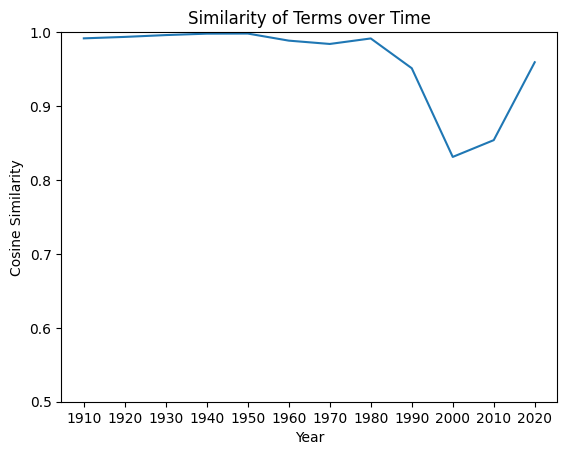

In [106]:
decades_for_plot = []
for dec in decade_to_present(1910):
    decades_for_plot.append(dec)
x = decades_for_plot
y = np.array(relation_over_time('disobedience', 'non-violent', 1910))

plt.plot(x, y)
plt.ylim(0.5, 1)
plt.xlabel("Year")
plt.ylabel("Cosine Similarity")
plt.title("Similarity of Terms over Time")
plt.show


In [156]:
term_over_time('occupy', 1900)

["1900 top 5 [('nowhere_1900', 0.9993923902511597), ('compel_1900', 0.9993909001350403), ('arises_1900', 0.9992655515670776), ('combined_1900', 0.9991982579231262), ('fewer_1900', 0.9991815686225891)]",
 "1910 top 5 [('ventured_1910', 0.9991927146911621), ('sympathies_1910', 0.9991327524185181), ('england._1910', 0.9991322159767151), ('indians_1910', 0.9990777969360352), ('respected_1910', 0.9990465044975281)]",
 "1920 top 5 [('emotional_1920', 0.9993462562561035), ('psychologically_1920', 0.9993199110031128), ('output_1920', 0.999241054058075), ('agencies_1920', 0.9992210268974304), ('destiny_1920', 0.9991979002952576)]",
 "1930 top 5 [('appealed_1930', 0.9992253184318542), ('isn’t_1930', 0.9991707801818848), ('withdraw_1930', 0.9991099834442139), ('betrayed_1930', 0.9990456104278564), ('numbers_1930', 0.9989174008369446)]",
 "1940 top 5 [('optimistic_1940', 0.9993131756782532), ('disorder_1940', 0.9991917014122009), ('colonial_1940', 0.9991800785064697), ('practically_1940', 0.999173

In [157]:
relation_over_time('occupy', 'park', 1900)

[0.9956895,
 0.9906651,
 0.9941141,
 0.99573195,
 0.99741274,
 0.9962584,
 0.99165577,
 0.92174655,
 0.9624916,
 0.89190924,
 0.7854062,
 0.7233846,
 0.83234847]

<function matplotlib.pyplot.show(close=None, block=None)>

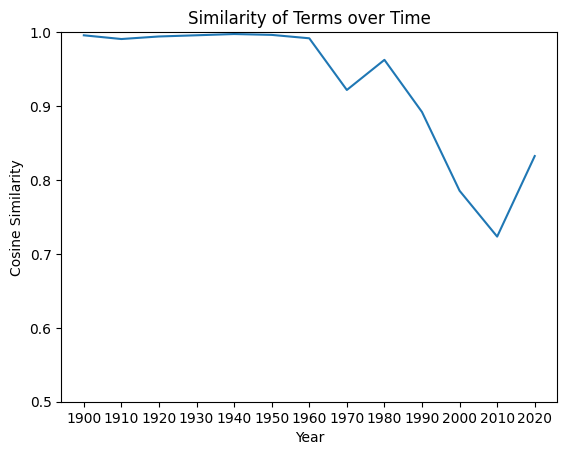

In [158]:
decades_for_plot = []
for dec in decade_to_present(1900):
    decades_for_plot.append(dec)
x = decades_for_plot
y = np.array(relation_over_time('occupy', 'park', 1900))

plt.plot(x, y)
plt.ylim(0.5, 1)
plt.xlabel("Year")
plt.ylabel("Cosine Similarity")
plt.title("Similarity of Terms over Time")
plt.show

In [123]:
term_over_time('signal', 1900)

["1900 top 5 [('kindness._1900', 0.9989516139030457), ('intellectually_1900', 0.9988959431648254), ('beggars_1900', 0.9988185167312622), ('probable_1900', 0.9987912774085999), ('steady_1900', 0.9987905025482178)]",
 "1910 top 5 [('counter_1910', 0.9988174438476562), ('touches_1910', 0.9988009929656982), ('preacher_1910', 0.9987112283706665), ('insists_1910', 0.9986846446990967), ('70_1910', 0.9986755847930908)]",
 "1920 top 5 [('doubt._1920', 0.9988976120948792), ('originate_1920', 0.9987751841545105), ('disgusted_1920', 0.9987186789512634), ('demon_1920', 0.9987160563468933), ('excellence_1920', 0.9986726641654968)]",
 "1930 top 5 [('happening_1930', 0.9992855787277222), ('jails_1930', 0.9991858005523682), ('tested_1930', 0.9991698265075684), ('uniting_1930', 0.9991494417190552), ('triumphant_1930', 0.9990735650062561)]",
 "1940 top 5 [('threw_1940', 0.9993932843208313), ('prophetic_1940', 0.9990622401237488), ('cash_1940', 0.9990388751029968), ('ruler_1940', 0.999035656452179), ('rem

In [153]:
term_over_time('spanish', 1880)

["1880 top 5 [('japanese_1880', 0.9845362901687622), ('polish_1880', 0.9778719544410706), ('italian_1880', 0.9774574637413025), ('chinese_1880', 0.969782292842865), ('turkish_1880', 0.9688681960105896)]",
 "1890 top 5 [('japanese_1890', 0.9907766580581665), ('chinese_1890', 0.9893921613693237), ('turkish_1890', 0.9843576550483704), ('polish_1890', 0.9776925444602966), ('sharealike_1890', 0.9732789993286133)]",
 "1900 top 5 [('japanese_1900', 0.9945099353790283), ('chinese_1900', 0.9928640723228455), ('italian_1900', 0.9902507066726685), ('greek_1900', 0.9895303845405579), ('dutch_1900', 0.9867391586303711)]",
 "1910 top 5 [('chinese_1910', 0.9953161478042603), ('italian_1910', 0.9872899055480957), ('japanese_1910', 0.9849951267242432), ('sharealike_1910', 0.9802178144454956), ('mitchell_1910', 0.9781551361083984)]",
 "1920 top 5 [('chinese_1920', 0.9962478876113892), ('japanese_1920', 0.9931313991546631), ('italian_1920', 0.9925147891044617), ('turkish_1920', 0.9897794127464294), ('gre